#Code: Deployment Pipelines

##Code: Deployment Pipelines

The final stage of delivering an ML project includes the following three steps:


*   *Model Serving* – The process of deploying the ML model in a production environment.
*   *Model Performance Monitoring* – The process of observing the ML model performance based on live and previously unseen data, such as prediction or recommendation. In particular, we are interested in ML-specific signals, such as prediction deviation from previous model performance. These signals might be used as triggers for model re-training.
*   *Model Performance Logging* – Every inference request results in a log-record.
In the following, we discuss *Model Serving Patterns* and *Model Deployment Strategies.*




##Model Serving Patterns

Three components should be considered when we serve an ML model in a production environment. The inference is the process of getting data to be ingested by a model to compute predictions. This process requires a model, an interpreter for the execution, and input data.

Deploying an ML system to a production environment includes two aspects, first deploying the pipeline for automated retraining and ML model deployment. Second, providing the API for prediction on unseen data.

Model serving is a way to integrate the ML model in a software system. We distinguish between five patterns to put the ML model in production: **Model-as-Service, Model-as-Dependency, Precompute, Model-on-Demand, and Hybrid-Serving**. Please note that the above-described model serialization formats might be used for any of the model serving patterns.

The following taxonomy shows these approaches:

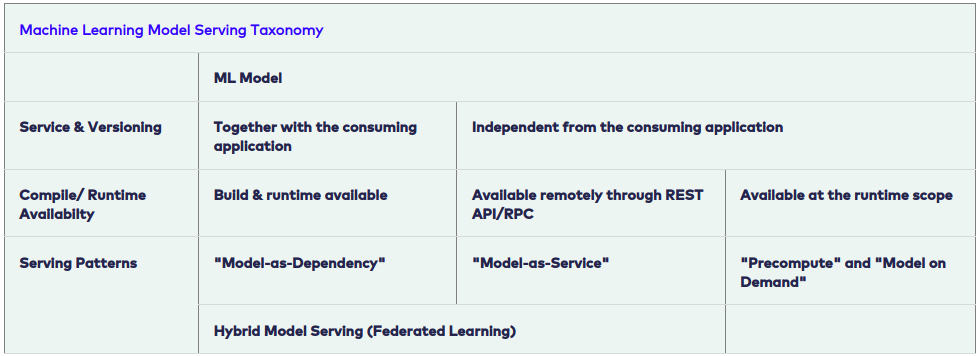

Now, we present the serving patterns to productionize the ML model such as **Model-as-Service, Model-as-Dependency, Precompute, Model-on-Demand, and Hybrid-Serving.**

##Model-as-Service

Model-as-Service is a common pattern for wrapping an ML model as an independent service. We can wrap the ML model and the interpreter within a dedicated web service that applications can request through a REST API or consume as a gRPC service.

This pattern can be used for various ML workflows, such as Forecast, Web Service, Online Learning.

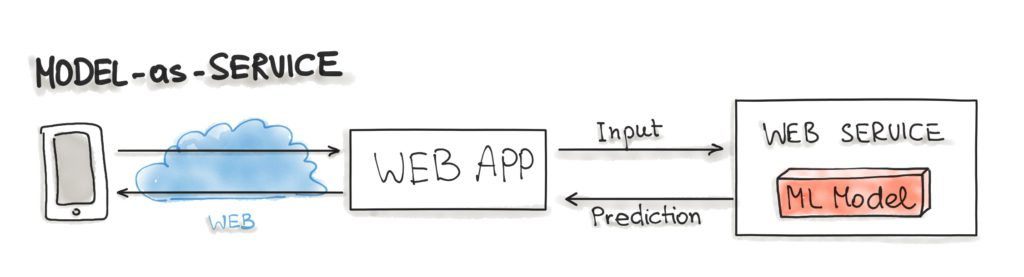

##Model-as-Dependency

Model-as-Dependency is probably the most straightforward way to package an ML model. A packaged ML model is considered as a dependency within the software application. For example, the application consumes the ML model like a conventional jar dependency by invoking the prediction method and passing the values. The return value of such method execution is some prediction that is performed by the previously trained ML model. The Model-as-Dependency approach is mostly used for implementing the Forecast pattern.

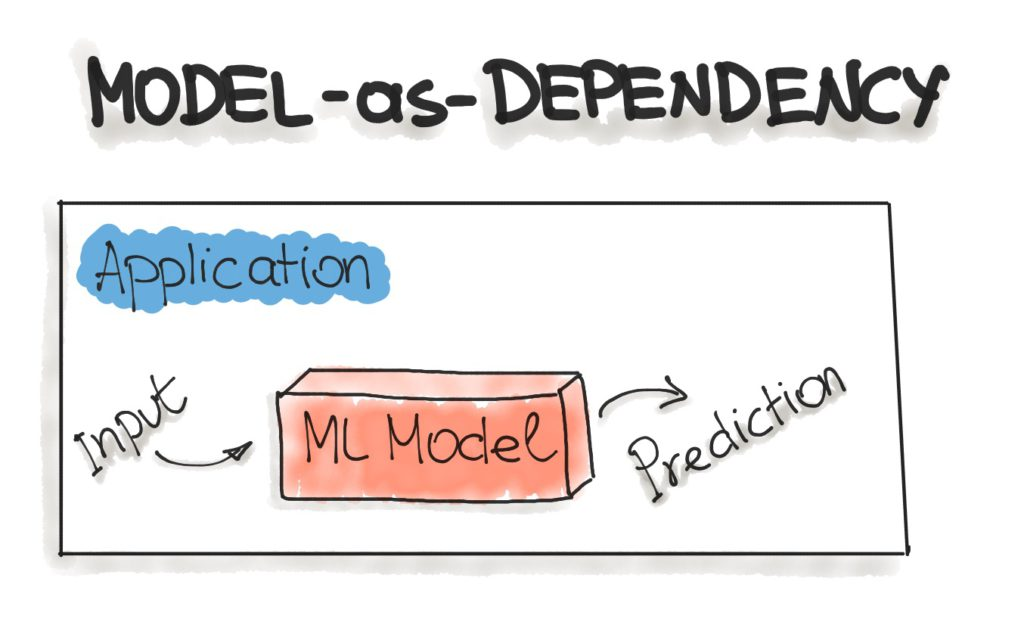

##Precompute Serving Pattern

This type of ML model serving is tightly related to the Forecast ML workflow. With the Precompute serving pattern, we use an already trained ML model and precompute the predictions for the incoming batch of data. The resulting predictions are persisted in the database. Therefore, for any input request, we query the database to get the prediction result.

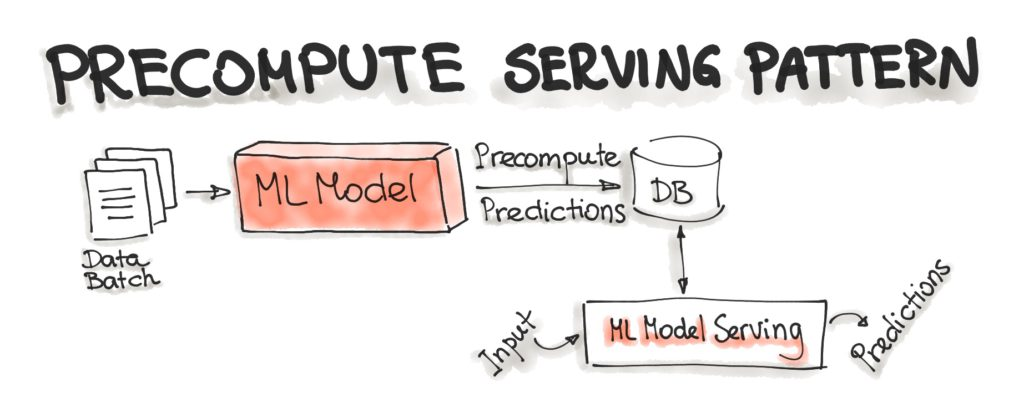

##Model-on-Demand

The Model-on-Demand pattern also treats the ML model as a dependency that is available at runtime. This ML model, contrary to the Model-as-Dependency pattern, has its own release cycle and is published independently.

The message-broker architecture is typically used for such on-demand model serving. The message-broker topology architecture pattern contains two main types of architecture components: a broker component and an event processor component. The broker component is the central part that contains the event channels that are utilised within the event flow. The event channels, which are enclosed in the broker component, are message queues. We can imagine such architecture containing input- and output-queues. A message broker allows one process to write prediction-requests in an input queue. The event processor contains the model serving runtime and the ML model. This process connects to the broker, reads these requests in batch from the queue and sends them to the model to make the predictions. The model serving process runs the prediction generation on the input data and writes the resulted predictions to the output queue. Afterwards, the queued prediction results are pushed to the prediction service that initiated the prediction request.

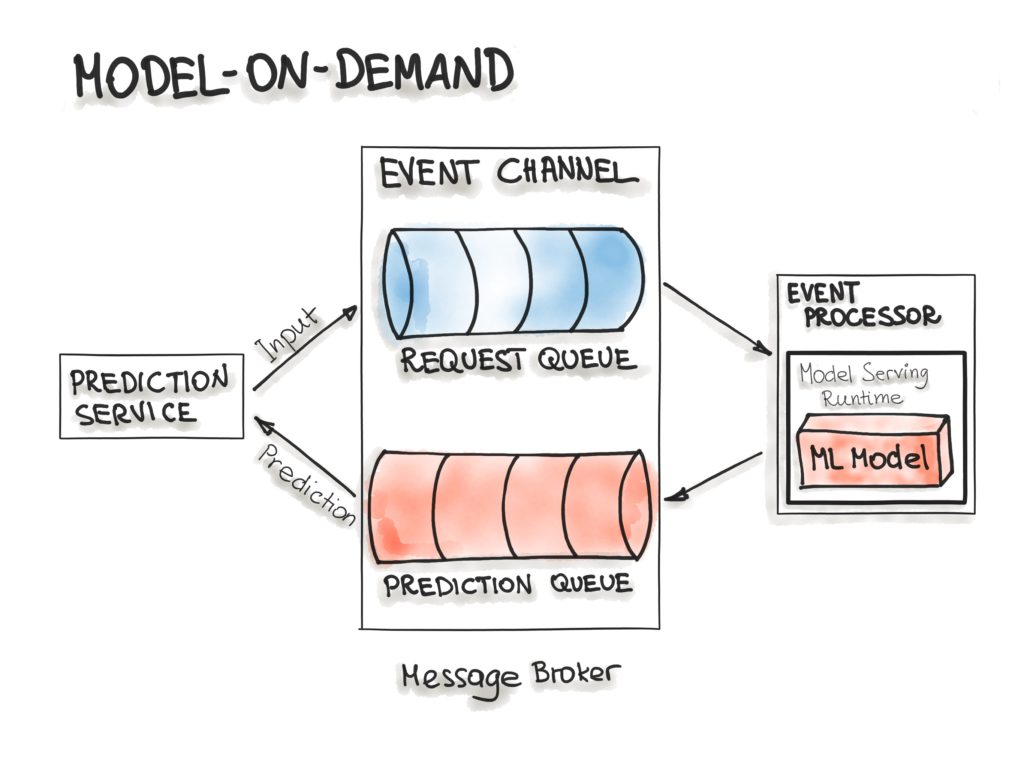

##Hybrid-Serving (Federated Learning)

Federated Learning, also known as hybrid-serving, is another way of serving a model to the users. It is unique in the way it does, there is not only one model that predicts the outcome, but there are also lots of it. Exactly spoken there are as many models as users exist, in addition to the one that’s held on a server. Let us start with the unique model, the one on the server. The model on the server-side is trained only once with the real-world data. It sets the initial model for each user. Also, it is a relatively general trained model so it fits for the majority of users. On the other side, there are the user-side models, which are the real unique models. Due to the raising hardware standards on mobile devices, it is possible for the devices to train their own models. Like that the devices will train their own highly specialized model for their own user. Once in a while, the devices send their already trained model data (not the personal data) to the server. There the server model will be adjusted, so the actual trends of the whole user community will be covered by the model. This model is set to be the new initial model that all devices are using. For not having any downsides for the users, while the server model gets updated, this happens only when the device is idle, connected to WiFi and charging. Also, the testing is done on the devices, therefore the newly adopted model from the server is sent to the devices and tested for functionality.

The big benefit of this is that the data used for training and testing, which is highly personal, never leaves the devices while still capturing all data that is available. This way it is possible to train highly accurate models while not having to store tons of (probably personal) data in the cloud. But there is no such thing as a free lunch, normal machine learning algorithms are built with homogeneously and large datasets on powerful hardware which is always available for training. With Federated Learning there are other circumstances, the mobile devices are less powerful, the training data is distributed across millions of devices and these are not always available for training. Exactly for this TensorFlow Federated (TFF) has been created. TFF is a lightweight form of TensorFlow created for Federated Learning.